# Module 1 Movie Project 

## Proposal to Microsoft 

## Goals:

* What determines successful movies?  
  * Genres? 
  * Seasonalities? 
  * Actors/Actresses?
  * Movie Duration? 
  
* Learning from past samples:
  * Movies released in 2009-2018
  * Movies in English only 
  * Worldwide gross sales/budget
    * From The Numbers
    * Box Office
  * Popularity Index
    * TheMovieDB.org
  * Genre, actors/actresses, length
    * IMDB

## Use Popularity index as gross revenue proxy
  * Popularity index: 
    * It's based on user interactions on the themoviedb.org website. Things like page views, users adding it to a list, users rating it, and other factors. Release date also plays a part with recently released shows weighted higher in popularity.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helperfunction as hf
%matplotlib inline
pd.set_option('display.precision', 3)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


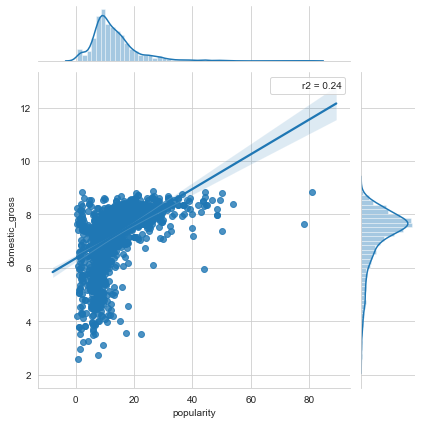

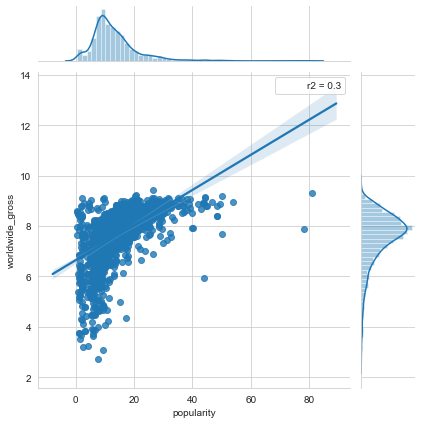

In [2]:
# popuarlity index have the highest R2 as compared to other vote features from both imdb and tmdb
budget_popularity = pd.read_pickle('data/budget_popularity.pkl')
sns.set_style('whitegrid')
sns.jointplot(budget_popularity['popularity'], np.log10(
    budget_popularity['domestic_gross']), kind="reg", stat_func=hf.r2)
sns.jointplot(budget_popularity['popularity'], np.log10(
    budget_popularity['worldwide_gross']), kind="reg", stat_func=hf.r2)
plt.show()

In [12]:
# first dataframe for finding proxy 
budget_popularity.head()  

,release_date_x,original_title,production_budget,domestic_gross,worldwide_gross,year,genre_ids,id,original_language,popularity,release_date_y,title,vote_average,vote_count
0,2009-12-18,Avatar,4.250e+08,7.605e+08,2.776e+09,2009,"[28, 12, 14, 878]",19995,en,26.526,2009-12-18,Avatar,7.4,18676
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,4.106e+08,2.411e+08,1.046e+09,2011,"[12, 28, 14]",1865,en,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,2015-05-01,Avengers: Age of Ultron,3.306e+08,4.590e+08,1.403e+09,2015,"[28, 12, 878]",99861,en,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457
3,2018-04-27,Avengers: Infinity War,3.000e+08,6.788e+08,2.048e+09,2018,"[12, 28, 14]",299536,en,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
4,2017-11-17,Justice League,3.000e+08,2.290e+08,6.559e+08,2017,"[28, 12, 14, 878]",141052,en,34.953,2017-11-17,Justice League,6.2,7510


## Genre and seasonalities:
  * chosen the top 6 most frequent genres: Drama, comedy, action, horror, documentary, thriller 
  * box plot for all 6 genres by month 

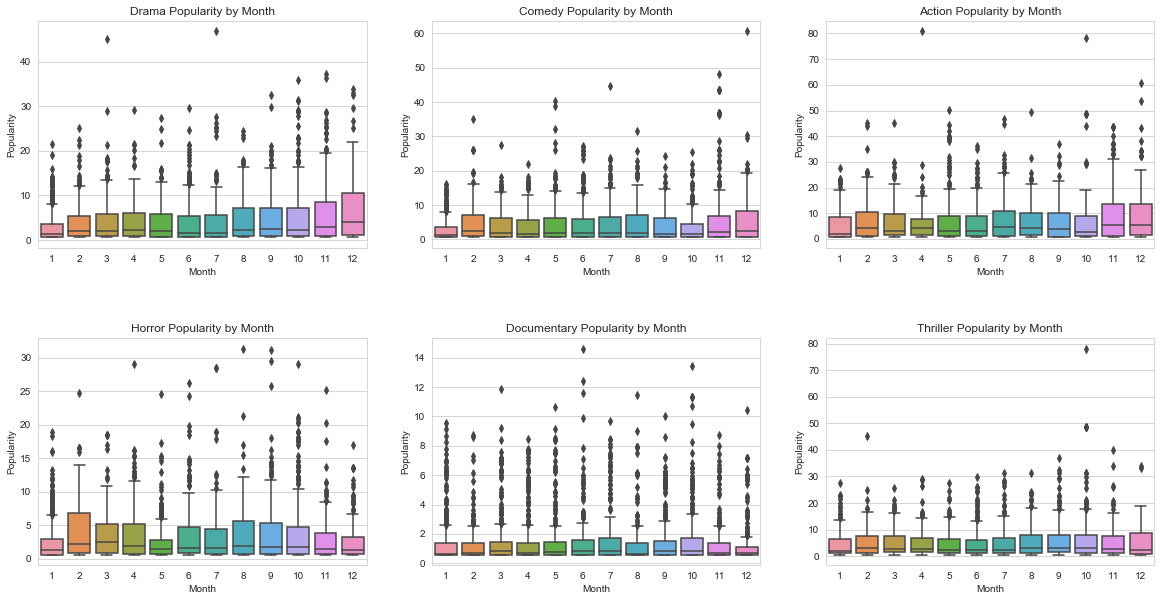

In [6]:
# load genres
genre_popularity = pd.read_pickle('data/genre_popularity.pkl')
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
# plot drama
drama = genre_popularity[genre_popularity.genres == 'Drama']
ax1 = plt.subplot(231)
ax1 = sns.boxplot(x="month", y="popularity", data=drama, ax=ax1)
ax1.set_xlabel('Month')
ax1.set_ylabel('Popularity')
ax1.set_title('Drama Popularity by Month')
# plot comdedy
comedy = genre_popularity[genre_popularity.genres == 'Comedy']
ax2 = plt.subplot(232)
ax2 = sns.boxplot(x="month", y="popularity", data=comedy, ax=ax2)
ax2.set_xlabel('Month')
ax2.set_ylabel('Popularity')
ax2.set_title('Comedy Popularity by Month')
# plot action
action = genre_popularity[genre_popularity.genres == 'Action']
ax3 = plt.subplot(233)
ax3 = sns.boxplot(x="month", y="popularity", data=action, ax=ax3)
ax3.set_xlabel('Month')
ax3.set_ylabel('Popularity')
ax3.set_title('Action Popularity by Month')
# plot horror
horror = genre_popularity[genre_popularity.genres == 'Horror']
ax4 = plt.subplot(234)
ax4 = sns.boxplot(x="month", y="popularity", data=horror, ax=ax4)
ax4.set_xlabel('Month')
ax4.set_ylabel('Popularity')
ax4.set_title('Horror Popularity by Month')
# plot documentary
documentary = genre_popularity[genre_popularity.genres == 'Documentary']
ax5 = plt.subplot(235)
ax5 = sns.boxplot(x="month", y="popularity", data=documentary, ax=ax5)
ax5.set_xlabel('Month')
ax5.set_ylabel('Popularity')
ax5.set_title('Documentary Popularity by Month')
# plot thriller
thriller = genre_popularity[genre_popularity.genres == 'Thriller']
ax6 = plt.subplot(236)
ax6 = sns.boxplot(x="month", y="popularity", data=thriller, ax=ax6)
ax6.set_xlabel('Month')
ax6.set_ylabel('Popularity')
ax6.set_title('Thriller Popularity by Month')
plt.subplots_adjust(hspace=0.4)
plt.show()

In [7]:
# second popularity dataframe for studying genres and month 
genre_popularity.head()  

,popularity,month,genres
0,33.533,11,Adventure
1,33.533,11,Fantasy
2,33.533,11,Family
3,28.734,3,Fantasy
4,28.734,3,Adventure


## The graph suggests minimal seasonal and genre influence for movie popularity 

## Hiring known actors and actress:
  * is more the better? 

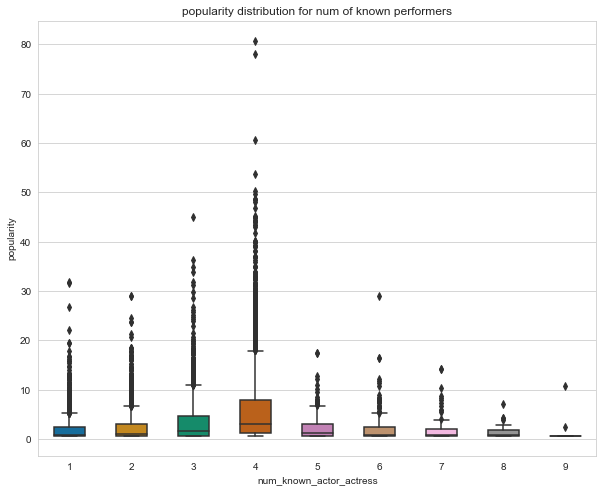

In [8]:
# load the dataset
performer_popularity = pd.read_pickle('data/performer_popularity.pkl')
# plot group by num_known_actor_actress
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
bplot = sns.boxplot(y='popularity', x='num_known_actor_actress',
                    data=performer_popularity,
                    width=0.5,
                    palette="colorblind")
plt.title('popularbity distribution for num of known performers')
plt.show()

## hiring 4 known actor_actress may be better than hiring too many or too few 

## Movie Length: 
  * divide the length into 4 bins:
    * 0 to 50 min
    * 50 min to 100 min
    * 100 min to 150 min
    * 150 min to 200 min

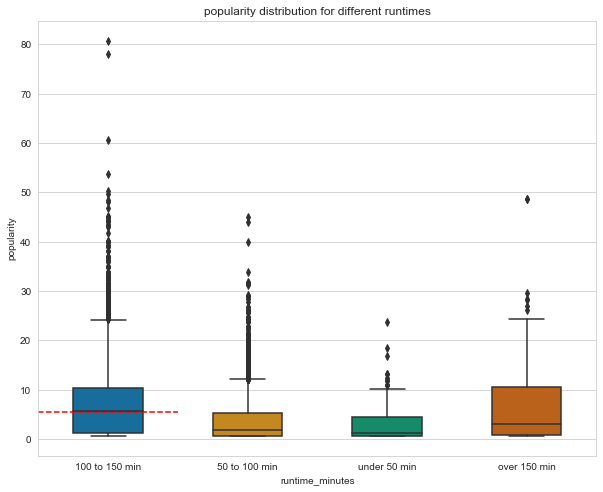

In [10]:
# use binning helper function from hf to bin the run time into 4 categories
performer_popularity.runtime_minutes = performer_popularity.runtime_minutes.apply(
    hf.binning)
# plot group by runtime_minutes
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
bplot = sns.boxplot(y='popularity', x='runtime_minutes',
                    data=performer_popularity,
                    width=0.5,
                    palette="colorblind")
plt.title('popularity distribution for different runtimes')
plt.hlines(y=5.5, xmin=-0.5, xmax=0.5, linestyle='--', color='red')
plt.show()

In [11]:
# third dataframe wrangled for study performers and runtime 
performer_popularity.head()

,num_known_actor_actress,runtime_minutes,popularity
0,4,100 to 150 min,9.800
1,4,50 to 100 min,4.705
2,4,50 to 100 min,0.877
3,4,50 to 100 min,1.206
4,4,50 to 100 min,1.721


## 100 to 150 min seems to be the best runtime length 

## Conclusions:
  1. No significant difference among different genres 
  2. No significant differences among months of release
  3. hiring around 4 known actor or actress can help improve popularity 
  4. movie length should be around 100 to 150 min